In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

# Extract features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_test = test_data.values

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check for missing values
print("Missing values in train data:", train_data.isnull().sum().sum())
print("Missing values in test data:", test_data.isnull().sum().sum())

# Impute missing values (if any)
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on validation set
val_preds = rf_classifier.predict(X_val)

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val, val_preds)
print("Validation Accuracy:", val_accuracy)

# Predict on test set
test_preds = rf_classifier.predict(X_test)

# Ensure the number of predictions matches the number of samples in the complete test set
print("Number of predictions for test set:", len(test_preds))
print("Number of samples in complete test set:", len(test_data))

# Reset the index of the submission DataFrame to match the length of predictions
submission.reset_index(drop=True, inplace=True)

# Update the 'Label' column with the predictions
submission['Label'] = test_preds

# Save the submission file
submission.to_csv('model.csv', index=False)


Missing values in train data: 222
Missing values in test data: 0
Validation Accuracy: 0.9618494188984336
Number of predictions for test set: 28000
Number of samples in complete test set: 28000


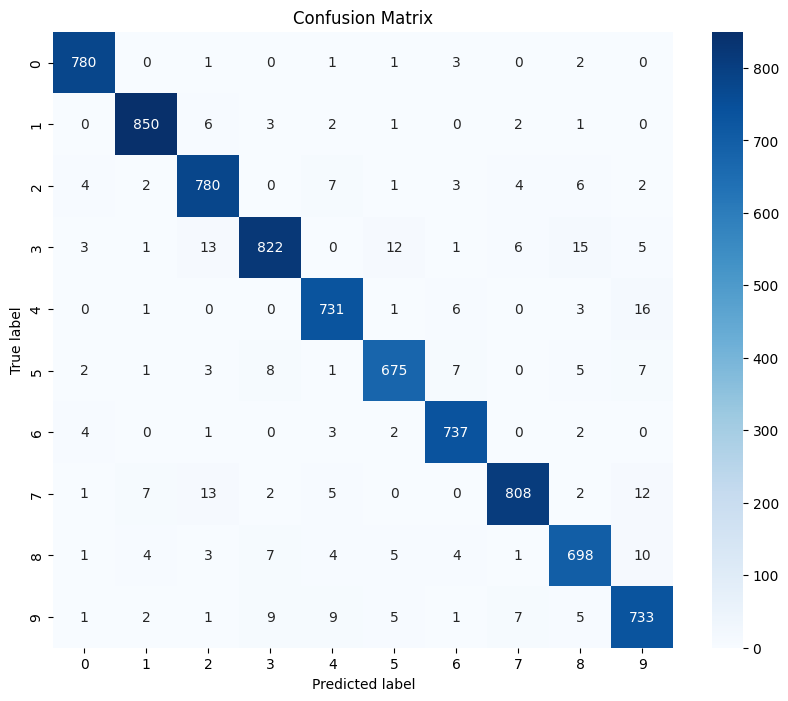

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val, val_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()